## Comparing Loss Components for Dentate Gyrus - Beta Vae with C

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob, os
import matplotlib
import re

In [8]:
path='/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs'
folders = os.listdir(path=path)
folders.sort(reverse=True)
print(folders)

['latent5_alpha5_c500', 'latent5_alpha5_c5', 'latent5_alpha5_c30', 'latent5_alpha5_c20', 'latent5_alpha5_c1000', 'latent5_alpha5_c10', 'latent5_alpha50_c500', 'latent5_alpha50_c5', 'latent5_alpha50_c30', 'latent5_alpha50_c20', 'latent5_alpha50_c10', 'latent5_alpha2_c5', 'latent5_alpha2_c30', 'latent5_alpha2_c20', 'latent5_alpha2_c10', 'latent5_alpha20_c500', 'latent5_alpha20_c5', 'latent5_alpha20_c30', 'latent5_alpha20_c20', 'latent5_alpha20_c1000', 'latent5_alpha20_c10', 'latent5_alpha1_c500', 'latent5_alpha1_c5', 'latent5_alpha1_c30', 'latent5_alpha1_c20', 'latent5_alpha1_c1000', 'latent5_alpha1_c10', 'latent5_alpha10_c5', 'latent5_alpha10_c30', 'latent5_alpha10_c20', 'latent5_alpha10_c10', 'latent5_alpha100_c500', 'latent5_alpha100_c5', 'latent5_alpha100_c30', 'latent5_alpha100_c20', 'latent5_alpha100_c1000', 'latent5_alpha100_c10', 'latent10_alpha5_c5', 'latent10_alpha5_c30', 'latent10_alpha5_c20', 'latent10_alpha5_c10', 'latent10_alpha50_c5', 'latent10_alpha50_c30', 'latent10_alph

# Latent 5

In [9]:

z_dims = []
alphas = []
c_vals = []
kl_loss_last = []
recon_loss_last = []
vae_loss_last = []
active_units = []

for folder_name in folders:
    if "latent" in folder_name:
        z = re.search('latent(\d+)', folder_name)
        if int(z[1]) == 10:
            continue
        al = re.search('alpha(\d+)', folder_name)
        c = re.search('_c(\d+)', folder_name)
        z_dims.append(int(z[1]))
        alphas.append(int(al[1]))
        c_vals.append(int(c[1]))
        df = pd.read_csv(path+"/"+folder_name+"/csv_logger.log")
        kl_loss_last.append(round(df.loc[df.index[-1],"kl_loss"],2))
        recon_loss_last.append(round(df.loc[df.index[-1],"recon_loss"],2))
        vae_loss_last.append(round(df.loc[df.index[-1],"loss"],2))
        count = 0
        for i in range(int(z[1])):
            col_name = "kl_loss_monitor"+str(i)
            if df.loc[df.index[-1],col_name] > 0.99:
                count = count + 1
        active_units.append(count)

In [10]:
print(active_units)
print(alphas)
print(c_vals)

[5, 3, 5, 5, 5, 3, 5, 1, 5, 5, 5, 4, 5, 5, 4, 5, 1, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 1, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 50, 50, 50, 50, 50, 2, 2, 2, 2, 20, 20, 20, 20, 20, 20, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 100, 100, 100, 100, 100, 100]
[500, 5, 30, 20, 1000, 10, 500, 5, 30, 20, 10, 5, 30, 20, 10, 500, 5, 30, 20, 1000, 10, 500, 5, 30, 20, 1000, 10, 5, 30, 20, 10, 500, 5, 30, 20, 1000, 10]


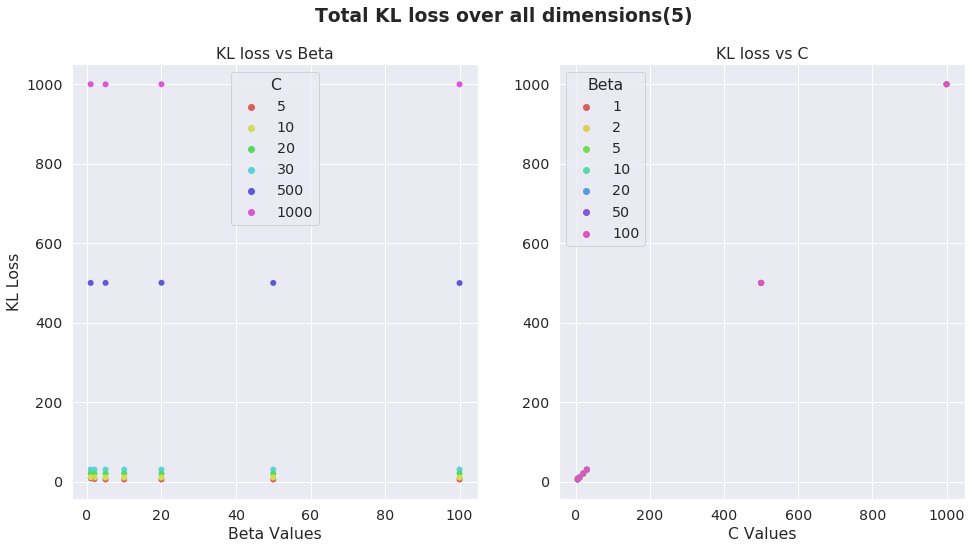

In [11]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,kl_loss_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,kl_loss_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

plt.suptitle("Total KL loss over all dimensions(5)", weight="bold")
scatter1.set_ylabel("KL Loss")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("C Values")

scatter1.get_legend().set_title("C")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("KL loss vs Beta")
scatter2.set_title("KL loss vs C")

plt.savefig(path+"/KL_loss_all_5.png",bbox_inches="tight")


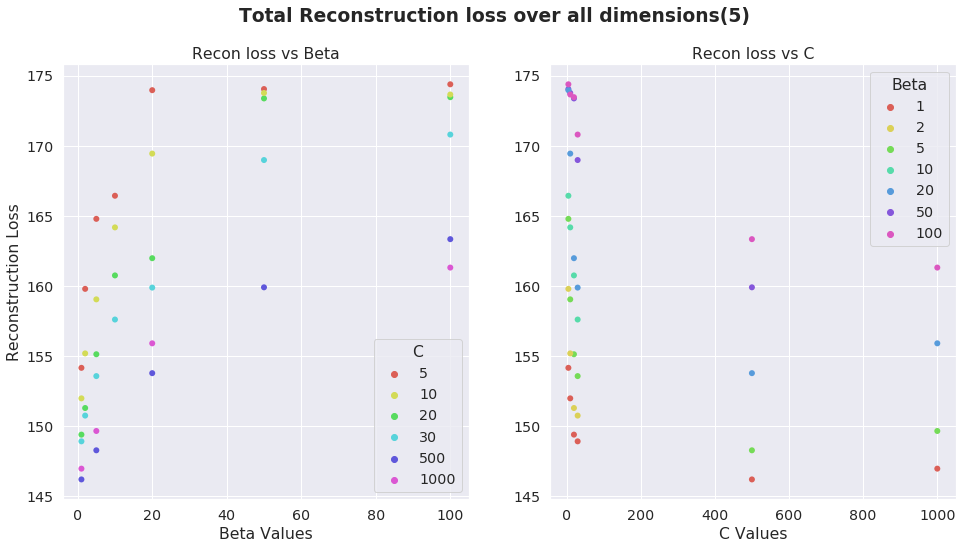

In [12]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,recon_loss_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,recon_loss_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

plt.suptitle("Total Reconstruction loss over all dimensions(5)", weight="bold")
scatter1.set_ylabel("Reconstruction Loss")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("C Values")

scatter1.get_legend().set_title("C")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("Recon loss vs Beta")
scatter2.set_title("Recon loss vs C")

plt.savefig(path+"/Recon_loss_all_5.png",bbox_inches="tight")


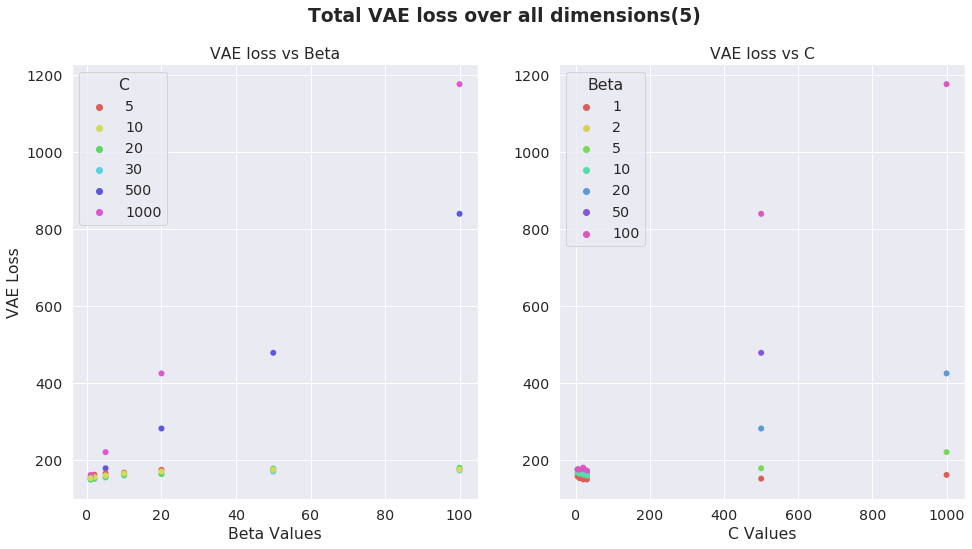

In [13]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,vae_loss_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,vae_loss_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

plt.suptitle("Total VAE loss over all dimensions(5)", weight="bold")
scatter1.set_ylabel("VAE Loss")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("C Values")

scatter1.get_legend().set_title("C")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("VAE loss vs Beta")
scatter2.set_title("VAE loss vs C")

plt.savefig(path+"/Vae_loss_all_5.png",bbox_inches="tight")


(0, 60)

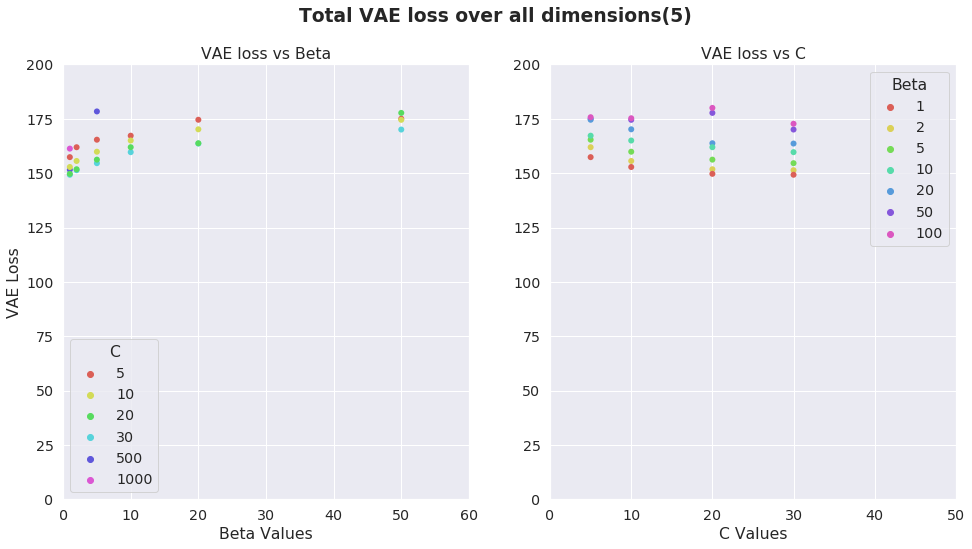

In [14]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,vae_loss_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,vae_loss_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

plt.suptitle("Total VAE loss over all dimensions(5)", weight="bold")
scatter1.set_ylabel("VAE Loss")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("C Values")

scatter1.get_legend().set_title("C")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("VAE loss vs Beta")
scatter2.set_title("VAE loss vs C")

scatter2.set_ylim([0, 200])
scatter2.set_xlim([0, 50])

scatter1.set_ylim([0, 200])
scatter1.set_xlim([0, 60])
#plt.savefig(path+"/Vae_loss_all_5.png")
